This notebook presents a simulation of 5000 ms of 400 descending commands and 800 motoneurons from soleus. The force is prduced by a Hill-type muscle model. 

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib notebook 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 6, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"


import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from NeuralTract import NeuralTract
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory
from jointAnkleForceTask import jointAnkleForceTask
from numba import jit, prange
import scipy as sc
from scipy.signal import *


In [2]:
conf = Configuration('confMUProperties.rmto')
conf.simDuration_ms = 30000 # Here I change simulation duration without changing the Configuration file.
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [3]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'TA')


Hill muscle of the TA muscle with maximum force of 674.0 N  built.
Muscle spindle from muscle TA built.
Motor Unit Pool TA built


In [19]:
tc = np.array([])
for i in xrange(len(pools[0].unit)):
    tc = np.append(tc, pools[0].unit[i].TwitchAmp_N)

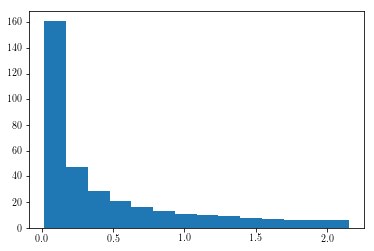

350


In [20]:
plt.figure()
plt.hist(tc,14)
plt.show()
print len(pools[0].unit)

In [6]:
tc1 = np.empty_like(tc)
P0 = tc[0]
Pn = tc[-1]
n = len(tc)
for i in xrange(250):
    tc1[i] = 110 * np.exp(np.log(86.5/110)/250*i)

for i in xrange(250,300):
    tc1[i] = 86.5 * np.exp(np.log(55.25/86.5)/50*(i-250))
    
for i in xrange(300,350):
    tc1[i] = 55.25 * np.exp(np.log(25/55.25)/50*(i-300))

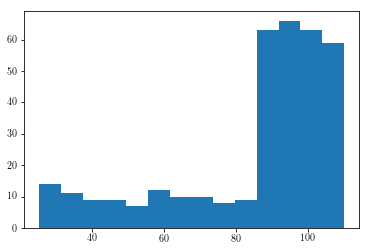

In [7]:
plt.figure()
plt.hist(tc1,14)
plt.show()

In [8]:
tc2 = np.empty_like(tc)
P0 = tc[0]
Pn = tc[-1]
n = len(tc)
for i in xrange(n):
    tc2[i] = P0 * np.exp(np.log(Pn/P0)/n*i)

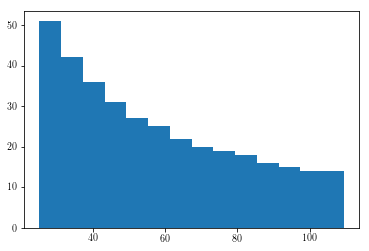

In [9]:
plt.figure()
plt.hist(tc2,14)
plt.show()

In [10]:
n = np.linspace(0,349,350)
tc3 = 110.0 * np.exp(np.log(25/110.0)/350.0*n)


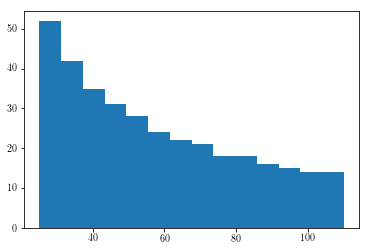

In [11]:
plt.figure()
plt.hist(tc3,14)
plt.show()

In [12]:
tc1 = np.empty_like(tc3)

for i in xrange(250):
    tc1[i] = 110 * np.exp(np.log(86.5/110)/250*i)

for i in xrange(250,300):
    tc1[i] = 86.5 * np.exp(np.log(55.25/86.5)/50*(i-250))
    
for i in xrange(300,350):
    tc1[i] = 55.25 * np.exp(np.log(25/55.25)/50*(i-300))

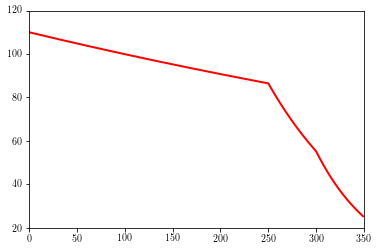

In [13]:
plt.figure()
plt.plot(n,tc1,'r-')
plt.xlim((0,350))
plt.ylim((20,120))
plt.show()

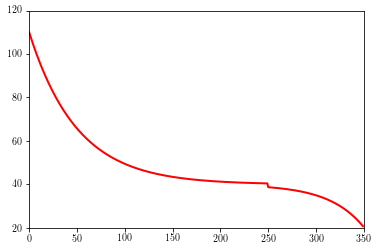

In [14]:
tc4 = np.empty_like(tc1)

for i in xrange(250):
    tc4[i] = (110-40.0) * np.exp(-0.02*i)+40.0

for i in xrange(250,350):
    tc4[i]= (40 - 20.25) * (1 - np.exp(1/50.0*np.log((35-40.0)/(20.25-40))*(350-(i)))) + 20.25
    
#for i in xrange(300,350):
#    tc4[i] = 55.25 - 30.25*(1 - np.exp(-30.25/500*(i-300)))
    
plt.figure()
plt.plot(n,tc4,'r-')
plt.xlim((0,350))
plt.ylim((20,120))
plt.show()

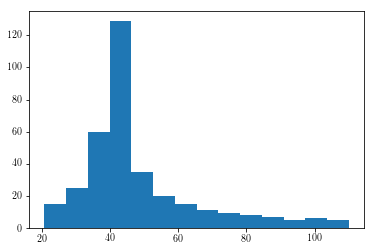

In [15]:
plt.figure()
plt.hist(tc4,14)
plt.show()

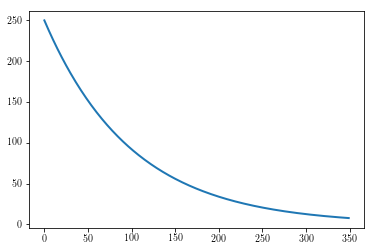

In [16]:
plt.plot(n,(250-50)*np.exp(-0.01*n)+(50)*np.exp(-0.01*n))

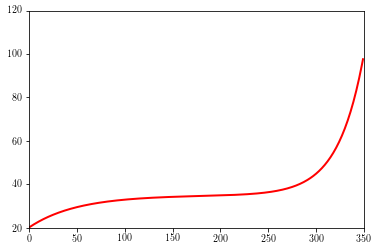

In [17]:
tc5 = np.empty_like(tc1)
'''
VS1 = 100.0
VFR1 = 45.0
VFF1 = 35.0
VFFN = 20.25
'''
VS1 = 20.25
VFR1 = 35.0
VFF1 = 45.0
VFFN = 100
Nmu = 350
NmuS = 250
NmuFF = 50

for i in xrange(350):
    tc5[i] = ((VS1 - VFR1) * np.exp(-5.0*i/NmuS) + 
              (VFR1 - VFFN) * (1.0 - np.exp(1.0/NmuFF*np.log((VFF1 - VFR1)/(VFFN - VFR1)) * (Nmu - i))) + VFFN)

plt.figure()
plt.plot(n,tc5,'r-')
plt.xlim((0,350))
plt.ylim((20,120))
plt.show()

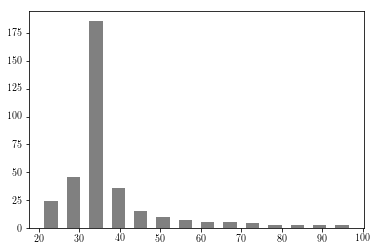

In [18]:
plt.figure()
plt.hist(tc5,14,rwidth=0.6,color='grey')
plt.show()